In [97]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [120]:
path = './instancias/c109.txt'

In [121]:
soluciones = """0 0.0 90 20.615528128088304 87 115.6155281280883 86 206.6155281280883 83 302.6155281280883 82 395.6155281280883 84 491.4464800229336 85 584.2749071476799 88 677.2749071476799 89 770.1033342724261 91 863.7088855478901 0 976.069565322888
0 0.0 67 12.206555615733702 65 103.2065556157337 62 198.5917204228682 74 291.5917204228682 72 386.5917204228682 61 479.5917204228682 64 571.5917204228682 68 664.5917204228682 66 759.9768852300027 69 851.9768852300027 0 957.7882735308447
0 0.0 63 15 81 140.35533905932738 78 233.35533905932738 76 325.3553390593274 71 420.3553390593274 70 515.3553390593274 73 608.3553390593274 77 702.3553390593274 79 793.3553390593274 80 888.740503866462 0 1030.2186545713969
0 0.0 13 30.805843601498726 17 124.80584360149872 18 217.80584360149874 19 312.80584360149874 15 407.80584360149874 16 502.80584360149874 14 594.8058436014987 12 687.8058436014987 0 815.8847091308182
0 0.0 20 10 8 119.6977156035922 10 213.3032668790562 25 320.50791741314146 27 412.50791741314146 26 506.11346868860545 11 613.3181192226907 9 706.480396882859 6 798.7164648603589 4 890.9525328378587 2 984.5580841133227 1 1076.5580841133228 0 1185.2396258055921
0 0.0 57 35 55 127.0 54 222.0 53 317.3851648071345 56 411.3851648071345 58 503.3851648071345 60 596.3851648071345 59 696.8254713160451 0 821.8825676019613
0 0.0 96 36.05551275463989 95 128.0555127546399 98 224.45863699207274 46 365.77140343474275 44 458.59983055948896 45 550.599830559489 48 642.599830559489 51 735.599830559489 50 827.8358985369888 52 920.9981761971571 49 1013.9981761971571 47 1105.9981761971571 0 1214.025932574477
0 0.0 24 15 32 123.02775637731995 33 215.02775637731995 31 310.4129211844545 35 405.4129211844545 37 501.2438730792998 38 593.2438730792999 39 688.2438730792999 36 783.2438730792999 0 908.5992121386273
0 0.0 43 16.55294535724685 41 110.15849663271084 40 202.15849663271084 42 294.986923757457 29 407.1905270686315 28 503.02147896347685 30 596.0214789634769 34 701.6419783152902 23 814.0026580902882 22 907.0026580902882 21 999.0026580902882 0 1099.2006971174737
0 0.0 5 15.132745950421556 7 107.36881392792134 3 199.36881392792134 94 317.38666538016514 92 410.99221665562914 93 502.99221665562914 97 597.9922166556291 100 692.9922166556291 99 787.9922166556291 75 896.0199730329491 0 1001.831361333791""".split('\n')

In [122]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [123]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [124]:
for route in solution:
    nodes = list(map(int, route.split()[::2]))
    edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
    G.add_edges_from(edges)

In [125]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

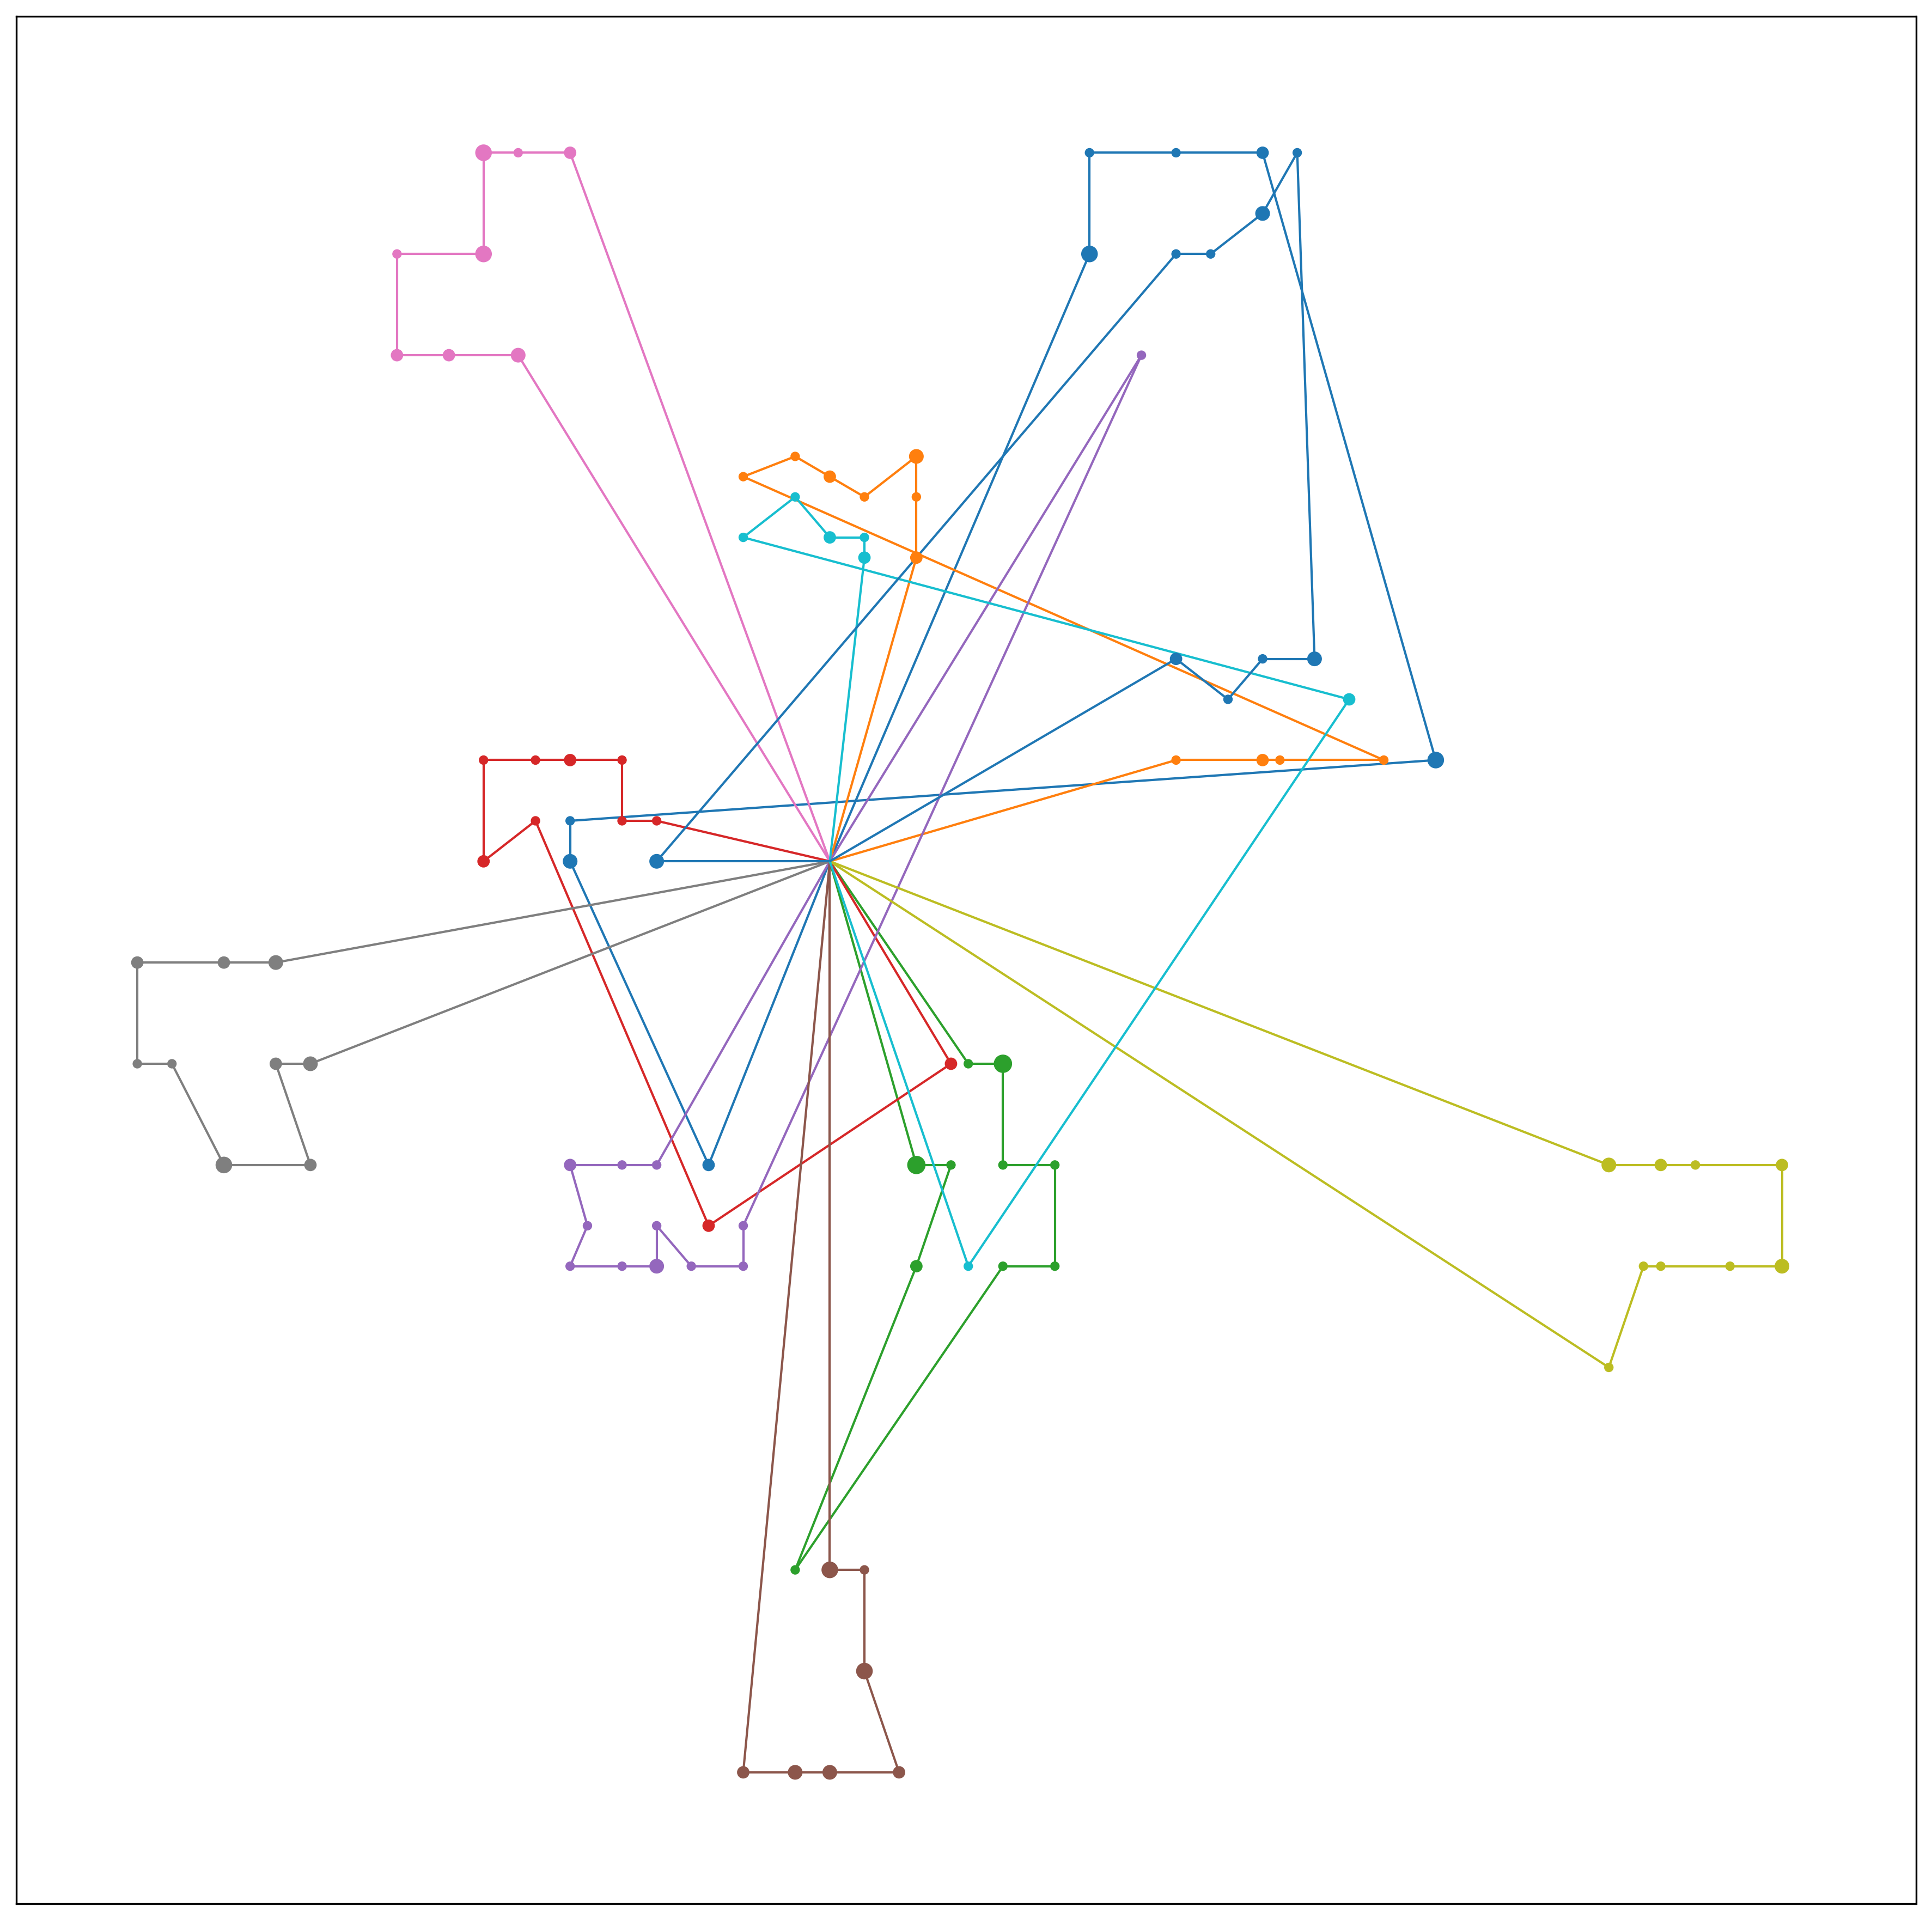

In [126]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)

pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(15,15), dpi=300)

for path in paths:

    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]

    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("c109.png", dpi=300)